In [1]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import openai
from openai.embeddings_utils import get_embedding
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, KFold, train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [16]:
listings = pd.read_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/Airbnb_Listings.csv')
neighborhoods = pd.read_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/neighbourhoods.csv')
reviews = pd.read_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/reviews.csv')

In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...",...,f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,...,f,f,moderate,f,t,12,12,0,0,0.08
2,17884,https://www.airbnb.com/rooms/17884,20200530151957,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...",none,"This is a very quiet family neighborhood, but ...",...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11
3,21373,https://www.airbnb.com/rooms/21373,20200530151957,2020-05-30,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,none,This room is in an ultra convenient location i...,...,f,f,moderate,f,f,5,0,5,0,2.17
4,37512,https://www.airbnb.com/rooms/37512,20200530151957,2020-05-31,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,none,Our community is a safe environment and at nig...,...,f,f,moderate,t,t,2,0,2,0,1.53


In [5]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.221000e+03,7.221000e+03,0.0,0.0,0.0,7.221000e+03,7220.000000,7220.000000,0.0,7221.000000,...,5851.000000,5852.000000,5851.000000,5851.000000,0.0,7221.000000,7221.000000,7221.000000,7221.000000,5912.000000
mean,2.623922e+07,2.020053e+13,NaN,NaN,NaN,8.886443e+07,139.588504,139.588504,NaN,37.352285,...,9.815074,9.793233,9.796103,9.527773,NaN,32.048608,28.216729,2.775793,1.029359,1.357124
std,1.236420e+07,0.000000e+00,NaN,NaN,NaN,9.390593e+07,472.674992,472.674992,NaN,0.064819,...,0.641301,0.691503,0.583498,0.833306,NaN,95.159193,95.714488,6.810433,5.741521,1.530782
min,4.952000e+03,2.020053e+13,NaN,NaN,NaN,7.054000e+03,0.000000,0.000000,NaN,36.965600,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.624242e+07,2.020053e+13,NaN,NaN,NaN,1.697278e+07,1.000000,1.000000,NaN,37.319770,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.320000
50%,2.818432e+07,2.020053e+13,NaN,NaN,NaN,4.800549e+07,3.000000,3.000000,NaN,37.358260,...,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,1.000000,1.000000,0.000000,0.830000
75%,3.749948e+07,2.020053e+13,NaN,NaN,NaN,1.429331e+08,10.000000,10.000000,NaN,37.398250,...,10.000000,10.000000,10.000000,10.000000,NaN,8.000000,2.000000,3.000000,0.000000,1.810000
max,4.359134e+07,2.020053e+13,NaN,NaN,NaN,3.477992e+08,2007.000000,2007.000000,NaN,37.462980,...,10.000000,10.000000,10.000000,10.000000,NaN,411.000000,411.000000,62.000000,48.000000,13.120000


In [20]:
for i, col in enumerate(listings):
    print(str(i) + " " + col)

0 id
1 listing_url
2 scrape_id
3 last_scraped
4 name
5 summary
6 space
7 description
8 experiences_offered
9 neighborhood_overview
10 notes
11 transit
12 access
13 interaction
14 house_rules
15 thumbnail_url
16 medium_url
17 picture_url
18 xl_picture_url
19 host_id
20 host_url
21 host_name
22 host_since
23 host_location
24 host_about
25 host_response_time
26 host_response_rate
27 host_acceptance_rate
28 host_is_superhost
29 host_thumbnail_url
30 host_picture_url
31 host_neighbourhood
32 host_listings_count
33 host_total_listings_count
34 host_verifications
35 host_has_profile_pic
36 host_identity_verified
37 street
38 neighbourhood
39 neighbourhood_cleansed
40 neighbourhood_group_cleansed
41 city
42 state
43 zipcode
44 market
45 smart_location
46 country_code
47 country
48 latitude
49 longitude
50 is_location_exact
51 property_type
52 room_type
53 accommodates
54 bathrooms
55 bedrooms
56 beds
57 bed_type
58 amenities
59 square_feet
60 price
61 weekly_price
62 monthly_price
63 security_

[Text about reviews]

Null analysis

In [13]:
listings_null_ratings_reviews = listings[listings['reviews_per_month'].isnull()]
listings_null_ratings_reviews['number_of_reviews'].describe()

count    1309.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: number_of_reviews, dtype: float64

In [14]:
listings_null_ratings_reviews.head()
# Filtered view of this table showing relevant columns

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
23,251163,https://www.airbnb.com/rooms/251163,20200530151957,2020-05-30,Family-friendly condo near downtown,NaN,"Located in the heart of Silicon Valley, this i...","Located in the heart of Silicon Valley, this i...",none,Close to downtown. Family friendly neighborhoo...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN
79,839590,https://www.airbnb.com/rooms/839590,20200530151957,2020-05-31,Petite Maison,NaN,"Nice quiet area, nice back yard, and close to ...","Nice quiet area, nice back yard, and close to ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
104,1012398,https://www.airbnb.com/rooms/1012398,20200530151957,2020-05-30,"Amazing 3800 sq.ft home, built 2012",NaN,"Completed in 2012, this 3800 sq.ft. 5br/4.5ba ...","Completed in 2012, this 3800 sq.ft. 5br/4.5ba ...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN
123,1154810,https://www.airbnb.com/rooms/1154810,20200530151957,2020-05-31,"Hacienda Ranch in Milpitas, CA",NaN,"Lovely, private suite with large bath with sho...","Lovely, private suite with large bath with sho...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
124,1164405,https://www.airbnb.com/rooms/1164405,20200530151957,2020-05-31,"Ultra Spacious, Contemporary Home in Palo Alto.","Beautifully decorated, contemporary 4 bedroom ...",[Our home has been completely remodeled. Uploa...,"Beautifully decorated, contemporary 4 bedroom ...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN


In [33]:
listings_cleaned_ratings_reviews = listings[listings['reviews_per_month'].notnull()]
# Remove $ and , from price column and convert to float
listings_cleaned_ratings_reviews['price'] = listings_cleaned_ratings_reviews['price'].str.replace('$', '').str.replace(',', '').astype('float')

# Replace reviews_per_month with price * reviews_per_month
listings_cleaned_ratings_reviews['reviews_per_month'] = listings_cleaned_ratings_reviews['reviews_per_month'] * listings_cleaned_ratings_reviews['price']

# Normalize review_scores_rating and reviews_per_month using StandardScaler
normalized_listings_cleaned_ratings_reviews = listings_cleaned_ratings_reviews.copy()
scaler = StandardScaler()
normalized_listings_cleaned_ratings_reviews['review_scores_rating'] = scaler.fit_transform(normalized_listings_cleaned_ratings_reviews[['review_scores_rating']])
normalized_listings_cleaned_ratings_reviews['reviews_per_month'] = scaler.fit_transform(normalized_listings_cleaned_ratings_reviews[['reviews_per_month']])

# Filer normalized_listings_cleaned_ratings_reviews to only include rows where review_scores_rating is above 0.5 and reviews_per_month is less than -0.5
normalized_listings_cleaned_ratings_reviews = normalized_listings_cleaned_ratings_reviews[normalized_listings_cleaned_ratings_reviews['review_scores_rating'] > 0.5]
normalized_listings_cleaned_ratings_reviews = normalized_listings_cleaned_ratings_reviews[normalized_listings_cleaned_ratings_reviews['reviews_per_month'] < -0.5]

/var/folders/r9/bzw4rbwd5nb52ddsnf14xsqm0000gn/T/ipykernel_1512/3085496310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_cleaned_ratings_reviews['price'] = listings_cleaned_ratings_reviews['price'].str.replace('$', '').str.replace(',', '').astype('float')
/var/folders/r9/bzw4rbwd5nb52ddsnf14xsqm0000gn/T/ipykernel_1512/3085496310.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_cleaned_ratings_reviews['reviews_per_month'] = listings_cleaned_ratings_reviews['reviews_per_month'] * li

In [36]:
normalized_listings_cleaned_ratings_reviews.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
33,315339,https://www.airbnb.com/rooms/315339,20200530151957,2020-05-31,Silicon Valley Victorian,In the heart of the Santa Clara Valley and an ...,Feel at home in this one of a kind renovated 1...,In the heart of the Santa Clara Valley and an ...,none,A 5 minute walk to Saratoga Village with many ...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,-0.507359
42,464637,https://www.airbnb.com/rooms/464637,20200530151957,2020-05-31,"Priv Ent, Studio, prv bath/long term/pets OK",The room is best described as an in-house stud...,This 4400sq ft executive home is occupied by a...,The room is best described as an in-house stud...,none,"The home is in an upscale, safe and quite neig...",...,f,f,moderate,f,f,1,0,1,0,-0.587000
66,706286,https://www.airbnb.com/rooms/706286,20200530151957,2020-05-31,COZY SUNNYVALE CONDO,The mastered room now has Queen Size Bed and t...,通勤･通学に便利な2LDKｱﾊﾟｰﾄ 即入居可! ﾊﾞｽﾙｰﾑとﾘﾋﾞﾝｸﾞﾙｰﾑの照明改装...,The mastered room now has Queen Size Bed and t...,none,The condo is close to Apple Park 2 or Apple HQ...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,-0.550701
85,913205,https://www.airbnb.com/rooms/913205,20200530151957,2020-05-31,Best for International visitor,NaN,About us: we are a nice professional couple wh...,About us: we are a nice professional couple wh...,none,NaN,...,f,f,moderate,f,f,1,0,1,0,-0.620228
89,931680,https://www.airbnb.com/rooms/931680,20200530151957,2020-05-30,HackerHome - Sunnyvale: bunk 2,The HackerHome Network New to the Valley? Tran...,Spacious home with music instruments and co-wo...,The HackerHome Network New to the Valley? Tran...,none,Located in the heart of Sunnyvale! Japanese D...,...,f,f,flexible,t,t,47,1,7,39,-0.596932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,11801023,https://www.airbnb.com/rooms/11801023,20200530151957,2020-05-31,Room Monthly+ Saratoga Cupertino,Large spacious uncluttered super clean 2500 sq...,Very quiet in single family neighborhood with ...,Large spacious uncluttered super clean 2500 sq...,none,"Quiet, spacious, and convenient to 5 grocery s...",...,f,f,flexible,f,f,17,2,15,0,-0.609754
1306,11968062,https://www.airbnb.com/rooms/11968062,20200530151957,2020-05-30,Upscale home brand new WHITE BED ROOM,"This is a fresh brand new sunny, family-friend...","Brand new home, fresh and clean, double insula...","This is a fresh brand new sunny, family-friend...",none,"VTA mono rail and bus station Carl's Jr., publ...",...,f,f,strict_14_with_grace_period,t,t,2,0,2,0,-0.562403
1310,11989476,https://www.airbnb.com/rooms/11989476,20200530151957,2020-05-31,Bedroom 1 of 3 - Private bedroom with shared bath,Bedroom 1 is one of three AirBnb bedrooms insi...,"Room has 4K smart TV, 25 Mbps wifi, ample stor...",Bedroom 1 is one of three AirBnb bedrooms insi...,none,It is close to freeway 101 and 85. 1.2 mi to ...,...,f,f,flexible,f,f,4,0,4,0,-0.575261
1316,12075634,https://www.airbnb.com/rooms/12075634,20200530151957,2020-05-31,Private Room with Bath,"Near (Hidden by Airbnb) , Apple company. Good...",NaN,"Near (Hidden by Airbnb) , Apple company. Good...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,-0.553590


In [35]:
print(len(normalized_listings_cleaned_ratings_reviews))

839


/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='review_scores_rating', ylabel='reviews_per_month'>

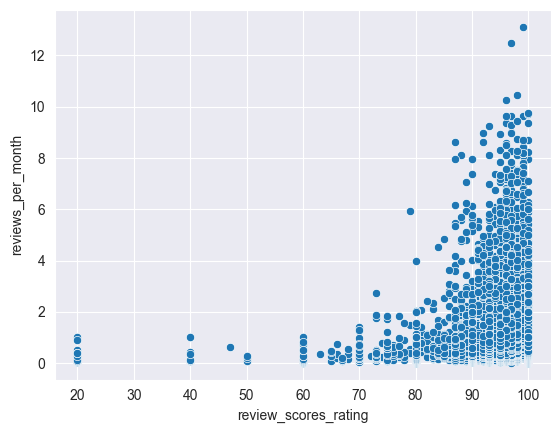

In [62]:
listings_cleaned_ratings_reviews = listings[listings['reviews_per_month'].notnull()]
listings_cleaned_ratings_reviews = listings_cleaned_ratings_reviews.filter(['reviews_per_month', 'review_scores_rating'])
sns.scatterplot(x='review_scores_rating', y='reviews_per_month', data=listings_cleaned_ratings_reviews)

/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='review_scores_rating', ylabel='reviews_per_month'>

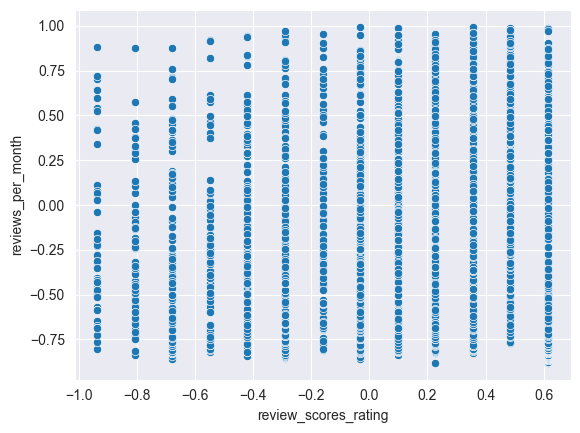

In [64]:
normalized_listings_cleaned_ratings_reviews = listings_cleaned_ratings_reviews.copy()
# Normalize each column in the DataFrame using scikit-learn
scaler = StandardScaler()
for col in normalized_listings_cleaned_ratings_reviews.columns:
    normalized_listings_cleaned_ratings_reviews[col] = scaler.fit_transform(normalized_listings_cleaned_ratings_reviews[[col]])
    
normalized_listings_cleaned_ratings_reviews = normalized_listings_cleaned_ratings_reviews[normalized_listings_cleaned_ratings_reviews['review_scores_rating'] > -1]
normalized_listings_cleaned_ratings_reviews = normalized_listings_cleaned_ratings_reviews[normalized_listings_cleaned_ratings_reviews['review_scores_rating'] < 1]
normalized_listings_cleaned_ratings_reviews = normalized_listings_cleaned_ratings_reviews[normalized_listings_cleaned_ratings_reviews['reviews_per_month'] < 1]
normalized_listings_cleaned_ratings_reviews = normalized_listings_cleaned_ratings_reviews[normalized_listings_cleaned_ratings_reviews['reviews_per_month'] > -1]


sns.scatterplot(x='review_scores_rating', y='reviews_per_month', data=normalized_listings_cleaned_ratings_reviews)

/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='review_scores_rating', ylabel='reviews_per_month'>

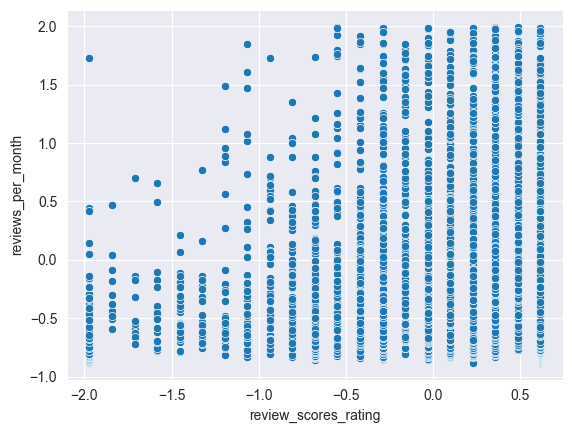

In [17]:
# Figure out way to add highlighting
sns.scatterplot(x='review_scores_rating', y='reviews_per_month', data=normalized_listings_cleaned_ratings_reviews)

Example of person in portion of data

In [18]:
# TODO

Data Cleaning to prepare for model

In [40]:
# Pick only relevant columns
cleaned_listings = listings.copy(True)
range_columns = np.r_[4:15, 19, 24:29, 34:37, 53:61, 63:67, 73:75, 86:94, 96:106]
cleaned_listings = cleaned_listings.iloc[:, range_columns]
cleaned_listings.drop('square_feet', axis=1, inplace=True)
cleaned_listings.drop('space', axis=1, inplace=True)

cleaned_listings = cleaned_listings[cleaned_listings['reviews_per_month'].notnull()]
# Replace nulls in notes, transit, and access columns with empty string
cleaned_listings['notes'].fillna('', inplace=True)
cleaned_listings['transit'].fillna('', inplace=True)
cleaned_listings['access'].fillna('', inplace=True)
cleaned_listings['interaction'].fillna('', inplace=True)
cleaned_listings['neighborhood_overview'].fillna('', inplace=True)
cleaned_listings['host_about'].fillna('', inplace=True)
cleaned_listings['house_rules'].fillna('', inplace=True)
cleaned_listings['summary'].fillna('', inplace=True)
cleaned_listings['description'].fillna('', inplace=True)

Drop columns with few null values

In [42]:
# count the number of null values in each column
null_counts = cleaned_listings.isnull().sum().sort_values(ascending=False)
# print the null counts
print(null_counts)

host_response_time                              1282
host_response_rate                              1282
security_deposit                                 935
cleaning_fee                                     400
host_acceptance_rate                             315
review_scores_checkin                             61
review_scores_location                            61
review_scores_value                               61
review_scores_accuracy                            60
review_scores_cleanliness                         60
review_scores_communication                       60
review_scores_rating                              58
beds                                              26
bedrooms                                           4
host_has_profile_pic                               1
host_identity_verified                             1
host_is_superhost                                  1
host_verifications                                 1
maximum_nights_avg_ntm                        

Clean up remaining columns

In [43]:
# Convert % strings in host_response_rate to floats
cleaned_listings['host_response_rate'] = cleaned_listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0
cleaned_listings['host_acceptance_rate'] = cleaned_listings['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

# Run one hot encoding on categorical columns
cleaned_listings = pd.get_dummies(cleaned_listings, columns=['host_response_time'])
cleaned_listings = pd.get_dummies(cleaned_listings, columns=['bed_type'])
cleaned_listings = pd.get_dummies(cleaned_listings, columns=['cancellation_policy'])

# Convert relevant columns to boolean, when == "f" is false, 1 when == "t" to true
cleaned_listings['host_is_superhost'] = cleaned_listings['host_is_superhost'].map({'f': False, 't': True})
cleaned_listings['host_has_profile_pic'] = cleaned_listings['host_has_profile_pic'].map({'f': False, 't': True})
cleaned_listings['host_identity_verified'] = cleaned_listings['host_identity_verified'].map({'f': False, 't': True})
cleaned_listings['requires_license'] = cleaned_listings['requires_license'].map({'f': False, 't': True})
cleaned_listings['instant_bookable'] = cleaned_listings['instant_bookable'].map({'f': False, 't': True})
cleaned_listings['is_business_travel_ready'] = cleaned_listings['is_business_travel_ready'].map({'f': False, 't': True})
cleaned_listings['require_guest_profile_picture'] = cleaned_listings['require_guest_profile_picture'].map({'f': False, 't': True})
cleaned_listings['require_guest_phone_verification'] = cleaned_listings['require_guest_phone_verification'].map({'f': False, 't': True})

# Find NaN values in host_response_rate and replace them with the average host_response_rate for that row's host_id
cleaned_listings['host_response_rate'] = cleaned_listings.groupby('host_id')['host_response_rate'].transform(lambda x: x.fillna(x.mean()))

# Get length of host_verifications for each row and replace value in row with length
cleaned_listings['host_verifications'] = cleaned_listings['host_verifications'].str.len()

# Count number of commas in string in amenities column and replace value in row with count
cleaned_listings['amenities'] = cleaned_listings['amenities'].str.count(',') + 1

# Replace nulls in 'security_deposit' column with 0
cleaned_listings['security_deposit'].fillna(0, inplace=True)
cleaned_listings['cleaning_fee'].fillna(0, inplace=True)

# Convert accommodates to a float
cleaned_listings['accommodates'] = cleaned_listings['accommodates'].astype('float')

# Handle columns with dollar signs
cleaned_listings['price'] = cleaned_listings['price'].str.replace('$', '').str.replace(',', '').astype('float')
cleaned_listings['security_deposit'] = cleaned_listings['security_deposit'].str.replace('$', '').str.replace(',', '').astype('float')
cleaned_listings['cleaning_fee'] = cleaned_listings['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype('float')
cleaned_listings['extra_people'] = cleaned_listings['extra_people'].str.replace('$', '').str.replace(',', '').astype('float')

# Drop host_id
cleaned_listings.drop('host_id', axis=1, inplace=True)

Data Preperation for modeling

Embeddings / PCA for text columns

In [3]:
vector_cleaned_listing = pd.read_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/vector_cleaned_listing_pca_deliverable.csv')

In [ ]:
# This code takes a long time to run. As such, we have saved the output in a csv file and have loaded it in the previous cell
openai.api_key = ''

def text_to_vector(text):
    if pd.isna(text):
        text = ""
    if text == "":
        # Return 1536 dimensional vector of 0's
        return [0] * 1536
    embedding_model = "text-embedding-ada-002"
    response = get_embedding(text, engine=embedding_model)
    return response

for i, column in enumerate(vector_cleaned_listing):
    # Check if column type is object
    if vector_cleaned_listing[column].dtype == 'object' and i <= 0:
      print(column)
      vector_cleaned_listing[column + '_embedding'] = vector_cleaned_listing.apply(lambda row : text_to_vector(row[i]), axis = 1)
      vector_cleaned_listing.drop(column, axis=1, inplace=True)

In [94]:
# Print column names and index and count of nulls
for i, col in enumerate(vector_cleaned_listing):
    print(str(i) + " " + col)

0 host_response_rate
1 host_acceptance_rate
2 host_is_superhost
3 host_verifications
4 host_has_profile_pic
5 host_identity_verified
6 accommodates
7 bathrooms
8 bedrooms
9 beds
10 amenities
11 price
12 security_deposit
13 cleaning_fee
14 guests_included
15 extra_people
16 minimum_nights_avg_ntm
17 maximum_nights_avg_ntm
18 review_scores_rating
19 review_scores_accuracy
20 review_scores_cleanliness
21 review_scores_checkin
22 review_scores_communication
23 review_scores_location
24 review_scores_value
25 requires_license
26 instant_bookable
27 is_business_travel_ready
28 require_guest_profile_picture
29 require_guest_phone_verification
30 calculated_host_listings_count
31 calculated_host_listings_count_entire_homes
32 calculated_host_listings_count_private_rooms
33 calculated_host_listings_count_shared_rooms
34 reviews_per_month
35 host_response_time_a few days or more
36 host_response_time_within a day
37 host_response_time_within a few hours
38 host_response_time_within an hour
39 be

In [93]:
def remove_null_bytes(s):
    try:
        return np.char.replace(s, '\x00', '')
    except:
       print(s)     

for i in range(48, 59):
    vector_cleaned_listing.iloc[:, i] = vector_cleaned_listing.iloc[:, i].apply(lambda x: np.array(eval(x)))

    
    def pca_transform(embeddings, explained_variance_threshold=0.8):
        # Split the embeddings into a DataFrame
        embeddings_df = pd.DataFrame(embeddings.tolist())
    
        # Apply PCA to the embeddings DataFrame
        pca = PCA()
        pca.fit(embeddings_df)
        cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
        n_components = np.argmax(cum_explained_variance >= explained_variance_threshold) + 1
        pca = PCA(n_components=n_components)
        transformed_embeddings = pca.fit_transform(embeddings_df)
    
        return transformed_embeddings
    
    # Apply PCA to the embedding column
    embedding_pca = pca_transform(vector_cleaned_listing.iloc[:, i])

    # Replace the original columns with the PCA components
    for j in range(embedding_pca.shape[1]):
        # Get column name at index i in vector_cleaned_listing
        column_name = vector_cleaned_listing.columns[i]
        vector_cleaned_listing[f'{column_name}_pca_{j+1}'] = embedding_pca[:, j]
    


/var/folders/r9/bzw4rbwd5nb52ddsnf14xsqm0000gn/T/ipykernel_3137/993306765.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vector_cleaned_listing[f'{column_name}_pca_{j+1}'] = embedding_pca[:, j]
/var/folders/r9/bzw4rbwd5nb52ddsnf14xsqm0000gn/T/ipykernel_3137/993306765.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vector_cleaned_listing[f'{column_name}_pca_{j+1}'] = embedding_pca[:, j]
/var/folders/r9/bzw4rbwd5nb52ddsnf14xsqm0000gn/T/ipykernel_3137/993306765.py:32: PerformanceWarning: DataFrame is highly fragmented.  

In [95]:
# Drop columns in index 48 to 59
vector_cleaned_listing.drop(vector_cleaned_listing.columns[48:59], axis=1, inplace=True)

In [4]:
vector_cleaned_listing.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,...,host_about_embedding_pca_27,host_about_embedding_pca_28,host_about_embedding_pca_29,host_about_embedding_pca_30,host_about_embedding_pca_31,host_about_embedding_pca_32,host_about_embedding_pca_33,host_about_embedding_pca_34,host_about_embedding_pca_35,host_about_embedding_pca_36
0,1.00,0.98,True,101.0,True,False,2.0,2.0,1.0,1.0,...,0.033275,0.018421,0.013244,-0.001764,-0.006754,0.039384,-0.013197,0.037695,0.042981,0.025222
1,1.00,0.98,True,101.0,True,False,1.0,2.0,1.0,1.0,...,0.033275,0.018421,0.013244,-0.001764,-0.006754,0.039384,-0.013197,0.037695,0.042981,0.025222
2,1.00,0.71,True,80.0,True,True,2.0,1.0,1.0,1.0,...,0.097094,0.093340,0.021906,0.003981,-0.040987,-0.005165,-0.034059,-0.012105,-0.017966,0.031584
3,0.86,0.77,False,107.0,True,True,1.0,1.0,1.0,1.0,...,0.029376,-0.006559,0.039884,-0.029022,-0.025634,0.034814,-0.014748,0.008729,-0.044042,0.044808
4,1.00,0.71,True,80.0,True,True,2.0,1.0,1.0,1.0,...,0.097094,0.093340,0.021906,0.003981,-0.040987,-0.005165,-0.034059,-0.012105,-0.017966,0.031584


In [55]:
vector_cleaned_listing = pd.read_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/vector_cleaned_listing_pca_deliverable.csv')
vector_cleaned_listing.head()
# Drop calculated_host_listings_count
vector_cleaned_listing.drop('calculated_host_listings_count', axis=1, inplace=True)
vector_cleaned_listing.drop('calculated_host_listings_count_entire_homes', axis=1, inplace=True)
vector_cleaned_listing.drop('calculated_host_listings_count_private_rooms', axis=1, inplace=True)
vector_cleaned_listing.drop('calculated_host_listings_count_shared_rooms', axis=1, inplace=True)
vector_cleaned_listing.to_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/vectors_cleaned_listing_pca_deliverable.csv', index=False)

In [96]:
vector_cleaned_listing.to_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/vector_cleaned_listing_pca_deliverable.csv', index=False)

In [56]:
# Read in vector_cleaned_listing_pca_deliverable.csv
vector_cleaned_listing = pd.read_csv('/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/Data/vectors_cleaned_listing_pca_deliverable.csv')
# Print number of nulls in each column in pca_columns
null_counts = vector_cleaned_listing.isnull().sum().sort_values(ascending=False)
print(null_counts)

# Convert all columns that are of type object to boolean using astype(bool)
for i, column in enumerate(vector_cleaned_listing):
    if vector_cleaned_listing[column].dtype == 'object':
      vector_cleaned_listing[column] = vector_cleaned_listing[column].astype(bool)

# Drop all rows with null values
vector_cleaned_listing.dropna(inplace=True)

host_response_rate                      0
experiences_offered_embedding_pca_17    0
experiences_offered_embedding_pca_19    0
experiences_offered_embedding_pca_20    0
experiences_offered_embedding_pca_21    0
                                       ..
summary_embedding_pca_5                 0
summary_embedding_pca_6                 0
summary_embedding_pca_7                 0
summary_embedding_pca_8                 0
host_about_embedding_pca_36             0
Length: 599, dtype: int64


In [57]:
# Normalize all numeric columns using sklearn
scaler = StandardScaler()
for col in vector_cleaned_listing.columns:
    if vector_cleaned_listing[col].dtype != 'object' and col != 'reviews_per_month':
        vector_cleaned_listing[col] = scaler.fit_transform(vector_cleaned_listing[[col]])

In [59]:
# print columns and index
for i, col in enumerate(vector_cleaned_listing):
    print(str(i) + " " + col)

0 host_response_rate
1 host_acceptance_rate
2 host_is_superhost
3 host_verifications
4 host_has_profile_pic
5 host_identity_verified
6 accommodates
7 bathrooms
8 bedrooms
9 beds
10 amenities
11 price
12 security_deposit
13 cleaning_fee
14 guests_included
15 extra_people
16 minimum_nights_avg_ntm
17 maximum_nights_avg_ntm
18 review_scores_rating
19 review_scores_accuracy
20 review_scores_cleanliness
21 review_scores_checkin
22 review_scores_communication
23 review_scores_location
24 review_scores_value
25 requires_license
26 instant_bookable
27 is_business_travel_ready
28 require_guest_profile_picture
29 require_guest_phone_verification
30 reviews_per_month
31 host_response_time_a few days or more
32 host_response_time_within a day
33 host_response_time_within a few hours
34 host_response_time_within an hour
35 bed_type_Airbed
36 bed_type_Couch
37 bed_type_Futon
38 bed_type_Pull-out Sofa
39 bed_type_Real Bed
40 cancellation_policy_flexible
41 cancellation_policy_moderate
42 cancellation

Modeling without text columns

In [60]:
# Drop embeddings for baseline
# Get column index for name_embedding_pca_1
name_embedding_pca_1_index = vector_cleaned_listing.columns.get_loc('name_embedding_pca_1')
vector_cleaned_listing_no_text = vector_cleaned_listing.drop(vector_cleaned_listing.columns[name_embedding_pca_1_index:], axis=1)

y = vector_cleaned_listing_no_text['reviews_per_month']
X = vector_cleaned_listing_no_text.drop('reviews_per_month', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
linear_scores = cross_validate(linear_model, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error', return_estimator=True, return_train_score=True)
linear_mse = -np.mean(linear_scores['test_score'])

# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=cv, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train.values, y_train.values)
lasso_best_mse = -lasso_grid.best_score_
lasso_best_params = lasso_grid.best_params_

# XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5]
}
xgb_grid = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), xgb_params, cv=cv, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train.values, y_train.values)
xgb_best_mse = -xgb_grid.best_score_
xgb_best_params = xgb_grid.best_params_

# Print most important features for xgboost model
xgb_model = xgb_grid.best_estimator_
xgb_model.fit(X_train.values, y_train.values)
feature_importances = pd.DataFrame(xgb_model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

(3993, 44)
host_response_rate                                 0
host_acceptance_rate                               0
review_scores_value                                0
requires_license                                   0
instant_bookable                                   0
is_business_travel_ready                           0
require_guest_profile_picture                      0
require_guest_phone_verification                   0
reviews_per_month                                  0
host_response_time_a few days or more              0
host_response_time_within a day                    0
host_response_time_within a few hours              0
host_response_time_within an hour                  0
bed_type_Airbed                                    0
bed_type_Couch                                     0
bed_type_Futon                                     0
bed_type_Pull-out Sofa                             0
bed_type_Real Bed                                  0
cancellation_policy_flexible       

/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/vinayakkannan/Desktop/Interviews/Vangaurd/Project/venv/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dty

                                                 importance
minimum_nights_avg_ntm                             0.102113
host_acceptance_rate                               0.062643
review_scores_rating                               0.047963
cleaning_fee                                       0.047072
guests_included                                    0.046379
host_response_time_within an hour                  0.046151
host_is_superhost                                  0.045566
bed_type_Couch                                     0.039822
accommodates                                       0.034099
require_guest_phone_verification                   0.034060
maximum_nights_avg_ntm                             0.032305
extra_people                                       0.030566
bedrooms                                           0.029511
cancellation_policy_moderate                       0.025708
review_scores_cleanliness                          0.025158
host_response_rate                      

Modeling with text columns

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_train_pred = linear_model.predict(X_train)
linear_test_pred = linear_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(**lasso_best_params)
lasso_model.fit(X_train, y_train)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **xgb_best_params)
xgb_model.fit(X_train, y_train)
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

# Calculate and print MSE and R^2 for each model on training data
for model_name, y_pred in zip(['Linear Regression', 'Lasso Regression', 'XGBoost'], [linear_train_pred, lasso_train_pred, xgb_train_pred]):
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    print(f"{model_name} Train MSE: {mse:.2f}, R^2: {r2:.2f}")

# Calculate and print MSE and R^2 for each model on test data
for model_name, y_pred in zip(['Linear Regression', 'Lasso Regression', 'XGBoost'], [linear_test_pred, lasso_test_pred, xgb_test_pred]):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Test MSE: {mse:.2f}, R^2: {r2:.2f}")

Linear Regression Train MSE: 1.95, R^2: 0.24
Lasso Regression Train MSE: 1.95, R^2: 0.24
XGBoost Train MSE: 0.11, R^2: 0.96
Linear Regression Test MSE: 920732383182711701897216.00, R^2: -331305586402696580038656.00
Lasso Regression Test MSE: 2.16, R^2: 0.22
XGBoost Test MSE: 1.42, R^2: 0.49


In [73]:
vector_cleaned_listing_with_text = vector_cleaned_listing.copy(deep=True)

y = vector_cleaned_listing_with_text['reviews_per_month']
X = vector_cleaned_listing_with_text.drop('reviews_per_month', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
linear_scores = cross_validate(linear_model, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error', return_estimator=True, return_train_score=True)
linear_mse = -np.mean(linear_scores['test_score'])

# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=cv, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train.values, y_train.values)
lasso_best_mse = -lasso_grid.best_score_
lasso_best_params = lasso_grid.best_params_

# XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5]
}
xgb_grid = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), xgb_params, cv=cv, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train.values, y_train.values)
xgb_best_mse = -xgb_grid.best_score_
xgb_best_params = xgb_grid.best_params_

# Print most important features for xgboost model
xgb_model = xgb_grid.best_estimator_
xgb_model.fit(X_train.values, y_train.values)
feature_importances = pd.DataFrame(xgb_model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                   importance
minimum_nights_avg_ntm               0.022190
host_response_time_within an hour    0.016383
host_about_embedding_pca_33          0.015415
review_scores_rating                 0.014485
guests_included                      0.013732
...                                       ...
bed_type_Futon                       0.000000
host_about_embedding_pca_2           0.000000
host_about_embedding_pca_3           0.000000
host_about_embedding_pca_4           0.000000
bed_type_Couch                       0.000000

[598 rows x 1 columns]


In [74]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_train_pred = linear_model.predict(X_train)
linear_test_pred = linear_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(**lasso_best_params)
lasso_model.fit(X_train, y_train)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **xgb_best_params)
xgb_model.fit(X_train, y_train)
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

# Calculate and print MSE and R^2 for each model on training data
for model_name, y_pred in zip(['Linear Regression', 'Lasso Regression', 'XGBoost'], [linear_train_pred, lasso_train_pred, xgb_train_pred]):
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    print(f"{model_name} Train MSE: {mse:.2f}, R^2: {r2:.2f}")

# Calculate and print MSE and R^2 for each model on test data
for model_name, y_pred in zip(['Linear Regression', 'Lasso Regression', 'XGBoost'], [linear_test_pred, lasso_test_pred, xgb_test_pred]):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Test MSE: {mse:.2f}, R^2: {r2:.2f}")

Linear Regression Train MSE: 1.12, R^2: 0.56
Lasso Regression Train MSE: 1.27, R^2: 0.50
XGBoost Train MSE: 0.05, R^2: 0.98
Linear Regression Test MSE: 120170858468165418278191104.00, R^2: -43240878088470996881244160.00
Lasso Regression Test MSE: 1.80, R^2: 0.35
XGBoost Test MSE: 1.40, R^2: 0.50


In [ ]:
xgb.importance_type